###### -----------------------------------------------------------------
## Data Science
### Python for Data Analysis 
#### Dataset: Titanic dataset
##### Last Updated : 26th Jan 2021
##### By Ramatu Yusuf
-------------------------------------------------------------------------


In [1]:
## Importing libraries
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.image as mpl
#import re

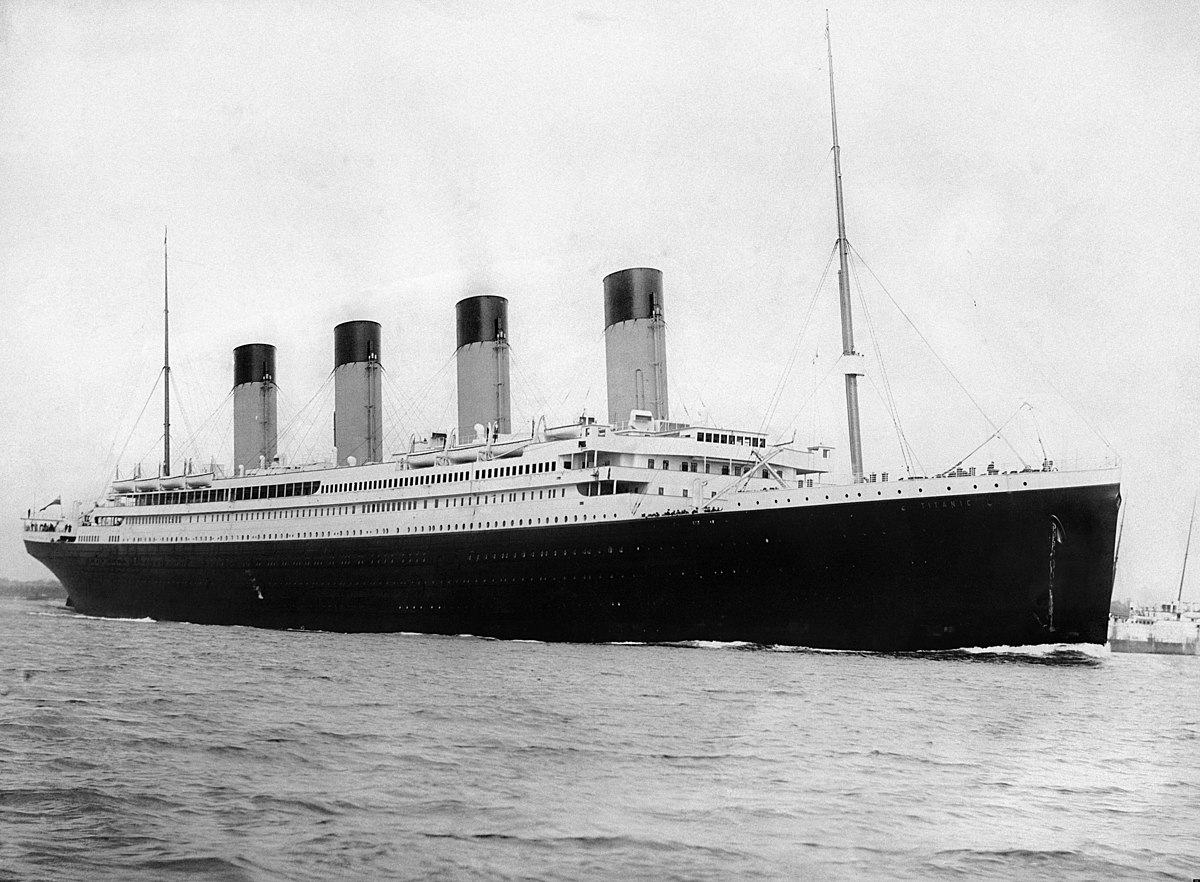

<Figure size 1008x360 with 0 Axes>

In [2]:
plt.figure(figsize=(14,5))
Image(r"C:\Users\Ramatu's PC\Downloads\1200px-RMS_Titanic_3.jpg")

In [3]:
#load the 'titanic' dataset
# The dataset contains information about car crashes in American states
df = sns.load_dataset('Titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Feature descriptions
- survived - Survival (0 = No; 1 = Yes)
- pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- fare - Passenger Fare (British pound)
- embarked/embark_town - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- class - Passenger Class (string)
- who - (man, woman, child)
- adult_male - boolean (true or false)
- alive - survival (yes or no)
- alone - traveling alone?


## Dataset Exploration


In [4]:
# show the number of nulls in each column
nulls = df.isnull().sum()
nulls

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
#check features for null values
nulls = nulls.sum()

#no nulls, great
print('\nThere are', df.shape[0],'rows in the dataset')
print('There are', df.shape[1],'columns (features) in the dataset')
print(f'There are {nulls} nulls in the dataset') #print('There are {}'.format(nulls),'nulls in the dataset')


There are 891 rows in the dataset
There are 15 columns (features) in the dataset
There are 869 nulls in the dataset


In [6]:
#statistical description of the columns in the dataframe
df.describe() # not very imformative in this case

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#returns the datatype of each column
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

#### Possible Questions for Analysis
- How many man, woman and children were on the ship
- Show the total number of children, men and women travelling in each ship class
- Show the total number of passengers that embarked from each town
- Were passengers more likely to belong to a certain class depending on which town they embarked from
- Return the dataframe only for women who did not survived the crash and were travelling in the First class.
- Return the dataframe only for women who did not survived the crash and were travelling in the second class. 
- Return the dataframe only for women who did not survived the crash and were travelling in the third class.
- Return a pivot table indexed by who, column by class, showing the Average Fare
- Return a crosstab ( for columns who, class)
- Find out **survival rate** of Passengers for each class
- Further breakdown the survival rate to see the rate for men, women and children in each class
- Find the survival rate of adult men
- What is the **fatality rate** of women, children and men in the titanic crash
- What proportion of passengers travelling alone survived the titanic crash
- Did the person who paid the highest ticket fare survive?
- Did the person who paid the lowest ticket fare survive?







In [8]:
print('(1)  How many man, woman and children were on the ship')
df['who'].value_counts()

(1)  How many man, woman and children were on the ship


man      537
woman    271
child     83
Name: who, dtype: int64

In [9]:
print('(2) Show the total number of children, men and women travelling in each class')
total_travelling = df.groupby(['class','who'])['survived'].count()
total_travelling


(2) Show the total number of children, men and women travelling in each class


class   who  
First   child      6
        man      119
        woman     91
Second  child     19
        man       99
        woman     66
Third   child     58
        man      319
        woman    114
Name: survived, dtype: int64

In [10]:
print('(3) Show the total number of passengers that embarked from each town')
total_embarked = df.groupby('embark_town')['survived'].count()
total_embarked

(3) Show the total number of passengers that embarked from each town


embark_town
Cherbourg      168
Queenstown      77
Southampton    644
Name: survived, dtype: int64

In [11]:
print('(4) Were passengers more likely to belong to a certain class depending on which town they embarked from')
class_status_embarked = df.groupby(['embark_town', 'class'])['survived'].count()
class_status_embarked/total_embarked

(4) Were passengers more likely to belong to a certain class depending on which town they embarked from


embark_town  class 
Cherbourg    First     0.505952
             Second    0.101190
             Third     0.392857
Queenstown   First     0.025974
             Second    0.038961
             Third     0.935065
Southampton  First     0.197205
             Second    0.254658
             Third     0.548137
Name: survived, dtype: float64

In [12]:
print('(5) Return the dataframe only for women who did not survived the crash and were travelling in the First class.')
df.loc[(df['who'] == 'woman') & (df['survived'] == 0) & (df['class'] == 'First'),:]


(5) Return the dataframe only for women who did not survived the crash and were travelling in the First class.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
498,0,1,female,25.0,1,2,151.5500,S,First,woman,False,C,Southampton,no,False


In [13]:
print('(6) Return the dataframe only for women who did not survived the crash and were travelling in the second class.')
df.loc[(df['who'] == 'woman') & (df['survived'] == 0) & (df['class'] == 'Second'),:]


(6) Return the dataframe only for women who did not survived the crash and were travelling in the second class.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
41,0,2,female,27.0,1,0,21.0,S,Second,woman,False,NaN,Southampton,no,False
199,0,2,female,24.0,0,0,13.0,S,Second,woman,False,NaN,Southampton,no,True
312,0,2,female,26.0,1,1,26.0,S,Second,woman,False,NaN,Southampton,no,False
357,0,2,female,38.0,0,0,13.0,S,Second,woman,False,NaN,Southampton,no,True
772,0,2,female,57.0,0,0,10.5,S,Second,woman,False,E,Southampton,no,True
854,0,2,female,44.0,1,0,26.0,S,Second,woman,False,NaN,Southampton,no,False


In [14]:
print('(7) Return the dataframe only for women who did not survived the crash and were travelling in the third class.')
df.loc[(df['who'] == 'woman') & (df['survived'] == 0) & (df['class'] == 'Third'),:]

(7) Return the dataframe only for women who did not survived the crash and were travelling in the third class.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
49,0,3,female,18.0,1,0,17.8000,S,Third,woman,False,NaN,Southampton,no,False
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False
100,0,3,female,28.0,0,0,7.8958,S,Third,woman,False,NaN,Southampton,no,True
113,0,3,female,20.0,1,0,9.8250,S,Third,woman,False,NaN,Southampton,no,False
114,0,3,female,17.0,0,0,14.4583,C,Third,woman,False,NaN,Cherbourg,no,True
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False
140,0,3,female,NaN,0,2,15.2458,C,Third,woman,False,NaN,Cherbourg,no,False


In [15]:
print('(8) Return a pivot table indexed by who, column by class, showing the Average Fare')

df.pivot_table(index = 'who',columns ='class',aggfunc = 'mean', values = 'fare') 

(8) Return a pivot table indexed by who, column by class, showing the Average Fare


class,First,Second,Third
who,,,
child,139.382633,28.323905,23.220190
man,65.951086,19.054124,11.340213
woman,104.317995,20.868624,15.354351


In [16]:
print('(9) Return a crosstab to show the total number of child, women and child who is alive or not (columns who, allive)')
pd.crosstab(df.who, df.alive, margins=True, margins_name='Total')

(9) Return a crosstab to show the total number of child, women and child who is alive or not (columns who, allive)


alive,no,yes,Total
who,,,
child,34,49,83
man,449,88,537
woman,66,205,271
Total,549,342,891


In [17]:
print('(10) Find out survival rate of Passengers for each class')
survived_crash = df.groupby('class')['survived'].sum()
total_passengers_by_class = df.groupby('class')['survived'].count()
Survival_rate_by_class = survived_crash/total_passengers_by_class
Survival_rate_by_class

(10) Find out survival rate of Passengers for each class


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [18]:
print('(11) Further breakdown the survival rate to see the rate for men, women and children in each class')
Survived_who_class = df.groupby(['class','who'])['survived'].sum()
Survival_rate_who_class = Survived_who_class/total_travelling
Survival_rate_who_class

(11) Further breakdown the survival rate to see the rate for men, women and children in each class


class   who  
First   child    0.833333
        man      0.352941
        woman    0.978022
Second  child    1.000000
        man      0.080808
        woman    0.909091
Third   child    0.431034
        man      0.119122
        woman    0.491228
Name: survived, dtype: float64

In [19]:
print('(12) Find the survival rate of adult men')
total_adult_male = df[df['adult_male'] == True].groupby('adult_male')[ 'survived' ].count().sum()
survived_adult_male = df[(df['adult_male'] == True) & (df['survived'] == 1) ].groupby('who')[ 'who' ].count().sum()
survival_rate_AM = survived_adult_male /total_adult_male 
survival_rate_AM
print("The Survival Rate for adult male is {0:.3f} !".format(survival_rate_AM))

(12) Find the survival rate of adult men
The Survival Rate for adult male is 0.164 !


In [20]:
print('(13) What is the fatality rate of women, children and men in the titanic crash')
total_records = df.groupby('who')[ 'who' ].count() 
total_fatal_records = df[df['alive']=='no' ].groupby('who')[ 'who' ].count()
fatality_rate = total_fatal_records / total_records
fatality_rate

(13) What is the fatality rate of women, children and men in the titanic crash


who
child    0.409639
man      0.836127
woman    0.243542
Name: who, dtype: float64

In [21]:
print('(14) What percentage of passengers travelling alone survived the titanic crash')
total_alone = df[df['alone'] == True].groupby('adult_male')[ 'survived' ].count().sum()# count of passengers travelling alone
total_entire_passengers = df['alone'].value_counts().sum() 
survived_alone = df[(df['alone'] == True) & (df['survived'] == 1) ].groupby('who')[ 'who' ].count().sum()# 
percentage_alone = survived_alone/total_alone * 100
percentage_entire_pop = survived_alone/total_entire_passengers * 100
print("{0:.2f} % of the passengers travelling alone survived".format(percentage_alone))
print("{0:.2f} % of the passengers that survived were travelling alone".format(percentage_entire_pop))

(14) What percentage of passengers travelling alone survived the titanic crash
30.35 % of the passengers travelling alone survived
18.29 % of the passengers that survived were travelling alone


In [22]:
print('(15) Did the person who paid the highest ticket fare survive?')
max_fare = df.fare.max()
Total_max_fare = df[(df.fare == max_fare)].groupby('who')[ 'who' ].count().sum() 
Total_max_fare_survived = df[(df.fare == max_fare) & (df.survived == 1)].groupby('who')[ 'who' ].count().sum()
data = df[(df.fare == max_fare) & (df.survived == 1)]
print('Out of the {} passengers that paid the Highest fare {} survived' .format(Total_max_fare, Total_max_fare_survived) )
data



(15) Did the person who paid the highest ticket fare survive?
Out of the 3 passengers that paid the Highest fare 3 survived


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [23]:
print('(16) Did the person who paid the loweest ticket fare survive?')
min_fare = df.fare.min()
Total_min_fare = df[(df.fare == min_fare)].groupby('who')[ 'who' ].count().sum() 
Total_min_fare_survived = df[(df.fare == min_fare) & (df.survived == 1)].groupby('who')[ 'who' ].count().sum()
data = df[(df.fare == min_fare) & (df.survived == 1)]
print('Out of the {} passengers that paid the lowest fare only {} survived' .format(Total_min_fare, Total_min_fare_survived) )
data
# The guy is a survivor, the odds are stacked against him (adult_male, third class, and travelling alone)

(16) Did the person who paid the loweest ticket fare survive?
Out of the 15 passengers that paid the lowest fare only 1 survived


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
